A função f(x) escolhida foi $$ln(cos(x)),$$ onde suas três primeiras derivadas são:

$$\frac{df(x)}{dx} = -tan(x)$$


$$\frac{d^2f(x)}{dx^2} = -sec^2(x)$$


$$\frac{d^3f(x)}{dx^3} = -2 \cdot sec^2(x) \cdot tan(x)$$


Com as três derivadas, é possível construir o polinômio de Taylor de ordem 3. Considerando a expansão ao redor do ponto $x_0 = 0.6$, escrevemos o polinômio como:


$$P_3(0.6) = ln(cos(0.6)) - \frac{tan(0.6) \cdot (x-0.6)}{1!} 
- \frac{sec^2(0.6) \cdot (x-0.6)^2}{2!} 
- \frac{2 \cdot sec^2(0.6) \cdot tan(0.6) \cdot (x-0.6)^3}{3!}$$


A função, no entanto, possui alguns pontos onde sua imagem tende ao infinito e, portanto, o ponto $x_0$ necessita ser escolhido de forma que sua imagem seja um valor válido. Abaixo está o código definindo as funções para, enfim, visualizarmos os gráficos.

In [1]:
#Importando as bibliotecas padrão
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):     #Definindo a função a ser estudada
  y = np.log(np.cos(x))
  return y

def df(x):     #Primeira derivada
  y = np.negative(np.tan(x))
  return y

def d2f(x):    #Segunda derivada
  y = np.negative(np.power(np.arccos(x),2))
  return y

def d3f(x):     #Terceira derivada
  y = np.multiply(np.negative(np.power(np.arccos(x),2)*np.tan(x)),2)
  return y

x0 = 0.6    #Definindo o ponto x0

def P_3(x):     #Polinômio de Taylor de ordem 3
  y = f(x0) + df(x0)*(x-x0) + (d2f(x0)/2)*(x-x0)**2 + (d3f(x0)/6)*(x-x0)**3
  return y

Com o polinômio de Taylor construído, o código abaixo serve para a montagem do gráfico onde compara a função e sua expansão de Taylor. Assim, podemos comparar seus comportamentos.

C:\Users\Giovanni\AppData\Local\Temp\ipykernel_408\3942830002.py:2: RuntimeWarning: invalid value encountered in log
  y = np.log(np.cos(x))


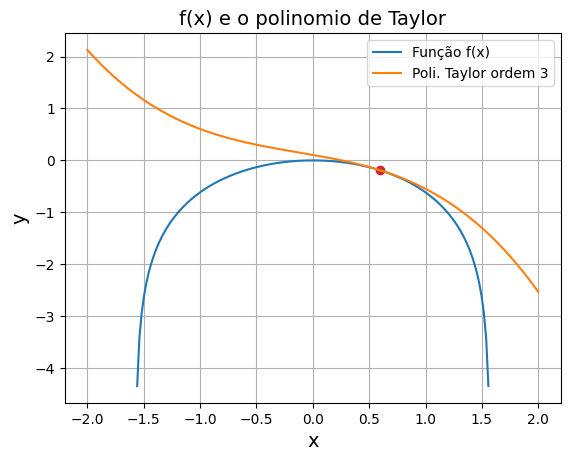

In [4]:
x = np.linspace(-2,2,200)   #Geração de 200 pontos entre -2 e 2 para plotagem do gráfico
fig, ax = plt.subplots()    #Define que o gráfico terá um subplot
ax.plot(x, f(x), label = 'Função f(x)')         #Plota f e dá sua respectiva legenda
ax.plot(x, P_3(x), label = 'Poli. Taylor ordem 3')   #Plota o polinômio de Taylor e dá sua legenda
ax.scatter(x0, f(x0), c='tab:red', marker = 'o')     #Ponto vermelho onde as funções se encontram
ax.set_xlabel('x',fontsize=14)   #Legenda do eixo X
ax.set_ylabel('y',fontsize=14)   #Legenda do eixo Y
ax.set_title('f(x) e o polinomio de Taylor',fontsize=14) #Título
ax.legend(loc='upper right')      #Gera a legenda e dá a posição da mesma
ax.grid(True)                     #Coloca o grid de linhas 
plt.show()                        #Gera o gráfico

#O erro apresentado abaixo se refere aos valores negativos inseridos no logaritmo, porém não afeta no funcionamento do código

Para melhor visualização, o código abaixo representa um zoom no gráfico, possibilitando demonstrar o comportamento do polinômio de Taylor perto do ponto escolhido, bem como a diferença entre ambos os gráficos.

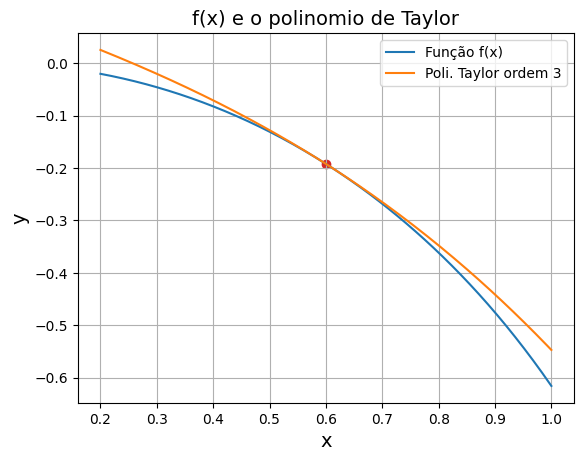

In [5]:
x = np.linspace(0.2,1,200)   #Geração de 200 pontos entre 0.2 e 1 para plotagem do gráfico
fig, ax = plt.subplots()    #Define que o gráfico terá um subplot
ax.plot(x, f(x), label = 'Função f(x)')         #Plota f e dá sua respectiva legenda
ax.plot(x, P_3(x), label = 'Poli. Taylor ordem 3')   #Plota o polinômio de Taylor e dá sua legenda
ax.scatter(x0, f(x0), c='tab:red', marker = 'o')     #Ponto vermelho onde as funções se encontram
ax.set_xlabel('x',fontsize=14)   #Legenda do eixo X
ax.set_ylabel('y',fontsize=14)   #Legenda do eixo Y
ax.set_title('f(x) e o polinomio de Taylor',fontsize=14) #Título
ax.legend(loc='upper right')      #Gera a legenda e dá a posição da mesma
ax.grid(True)                     #Coloca o grid de linhas 
plt.show()                        #Gera o gráfico 

Para calcular o valor da diferença entre ambas as funções, basta fazer 

$$f(x)-P_3(x)$$

Abaixo está um gráfico que simboliza tal diferença:

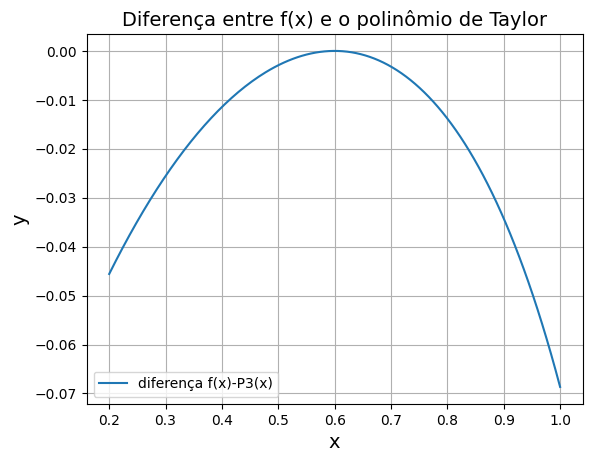

In [6]:
x=np.linspace(0.2,1,200)   #Geração de 200 pontos entre 0.2 e 1 para plotagem do gráfico
fig, ax = plt.subplots()   #Define que o gráfico terá um subplot
ax.plot(x, f(x) - P_3(x), label = 'diferença f(x)-P3(x)')   #Plota a diferença e dá sua respectiva legenda
ax.set_xlabel('x',fontsize=14)   #Legenda do eixo X
ax.set_ylabel('y',fontsize=14)   #Legenda do eixo Y
ax.set_title('Diferença entre f(x) e o polinômio de Taylor',fontsize=14)   #Título
ax.legend(loc='lower left')    #Gera a legenda e dá a posição da mesma
ax.grid(True)   #Coloca o grid de linhas
plt.show()    #Gera o gráfico 

Ademais, para calcular o erro entre ambas as funções, basta calcular o módulo da diferença, ou seja, 

$$Err(x_j)=|f(x_j)-P_3(x_j)|$$

No entanto, estes erros serão calculados nos pontos

$x_j=x_0+h_j,$ onde

$h_j=\frac{0.2}{2^j},$ sendo _j_=1, 2, ..., 5.

Portanto, o código que corresponde ao cálculo deste erro pode ser visto abaixo:

In [ ]:
a = []   #Declarar um array de tamanho indefinido para alocar os valores de hj

for i in range(5):    #For para preencher o array
  hj=0.2/(2**(i+1))    #Cálculo de hj
  a.append(hj)     #Preenche o array

xj = x0 + np.array(a)   #Cálculo de xj
e = np.abs(f(xj)-P_3(xj))   #Cálculo do erro absoluto

print(f'xj = {xj}')    #Printa xj
print(f'\nErro = {e}')    #Printa e

xj = [0.7     0.65    0.625   0.6125  0.60625]

Erro = [3.21143417e-03 7.79457377e-04 1.92336301e-04 4.77911567e-05
 1.19125676e-05]


Após encontrarmos os erros absolutos, é necessário calcular

$$p_j=log_2\left(\frac{Err(x_j)}{Err(x_{j+1})}\right)$$

Este cálculo pode ser visualizado no seguinte código:

In [10]:
pj=[]   #Declarar um array de tamanho indefinido para alocar os valores de pj

for i in range(4):    #For para inserir os valores de i
  z=e[i]/e[i+1]    #Cálculo da razão dos erros consecutivos
  pj.append(z)    #Preenche o array
  if(i+1==5):    #Condição para o denominador não buscar valor inexistente
    break

pj = np.log2(pj)   #Cálculo do logaritmo de base 2
print(f'Os valores dos erros consecutivos Pj são: \n\n{pj}')   #Printa pj

Os valores dos erros consecutivos Pj são: 

[2.04267568 2.01883905 2.00881549 2.00425928]
